In [4]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FuncFormatter
from pathlib import Path

# --- Variables / Thème ---
bg_color = "#1e1e2f"
primary_color = "#f4f4f4"
secondary_color = "#ff6f61"
third_color = "#ffc24a"
team = "Stade Lausanne-Ouchy"

# Thème Matplotlib (fond sombre + texte clair)
mpl.rcParams.update({
    "figure.facecolor": bg_color,
    "axes.facecolor": bg_color,
    "savefig.facecolor": bg_color,
    "axes.edgecolor": primary_color,
    "axes.labelcolor": primary_color,
    "xtick.color": primary_color,
    "ytick.color": primary_color,
    "text.color": primary_color,
    "grid.color": primary_color,
    "grid.alpha": 0.15,
    "axes.grid": True,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "legend.frameon": False,
    "font.size": 12,
})

# Cycle de couleurs (pour lignes/barres)
mpl.rcParams["axes.prop_cycle"] = plt.cycler(color=[secondary_color, third_color, primary_color])

# Options d’affichage pandas (optionnel)
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 50)

In [80]:
stats = {
    "possession": {
        "Yverdon Sport": 60.9,
        "Stade Lausanne-Ouchy": 55.2,
        "Vaduz": 54.5,
        "Étoile Carouge": 51.4,
        "Wil": 51.2,
        "Neuchâtel Xamax": 50.1,
        "Bellinzona": 44.3,
        "Aarau": 44.0,
        "Stade Nyonnais": 43.8,
        "Rapperswil-Jona": 43.5,
    },
    "passes_par_90": {  # nombre moyen de passes / match
        "Vaduz": 522.86,
        "Yverdon Sport": 459.92,
        "Wil": 411.71,
        "Neuchâtel Xamax": 416.00,
        "Étoile Carouge": 416.07,
        "Stade Lausanne-Ouchy": 381.68,
        "Stade Nyonnais": 350.26,
        "Rapperswil-Jona": 351.96,
        "Bellinzona": 349.93,
        "Aarau": 330.85,
    },
    "ppda": {  # plus bas = mieux
        "Rapperswil-Jona": 15.51,
        "Bellinzona": 14.19,
        "Étoile Carouge": 13.06,
        "Aarau": 11.82,
        "Stade Nyonnais": 11.39,
        "Yverdon Sport": 10.20,
        "Neuchâtel Xamax": 9.90,
        "Vaduz": 9.34,
        "Wil": 9.08,
        "Stade Lausanne-Ouchy": 7.47,
    },
    "ppda_against": {  # plus haut = mieux
        "Neuchâtel Xamax": 13.35,
        "Vaduz": 12.77,
        "Wil": 12.30,
        "Yverdon Sport": 11.63,
        "Étoile Carouge": 11.17,
        "Aarau": 10.76,
        "Rapperswil-Jona": 10.64,
        "Stade Lausanne-Ouchy": 9.97,
        "Bellinzona": 9.52,
        "Stade Nyonnais": 9.23,
    },
    "goals": {  # total buts marqués
        "Aarau": 20,
        "Vaduz": 19,
        "Yverdon Sport": 18,
        "Neuchâtel Xamax": 16,
        "Stade Lausanne-Ouchy": 14,
        "Stade Nyonnais": 13,
        "Rapperswil-Jona": 9,
        "Étoile Carouge": 9,
        "Wil": 7,
        "Bellinzona": 5,
    },
    "1vs1_total": {  # duels offensifs 1v1 gagnés - Total
        "Stade Lausanne-Ouchy": 272,
        "Étoile Carouge": 229,
        "Rapperswil-Jona": 202,
        "Yverdon Sport": 201,
        "Neuchâtel Xamax": 200,
        "Bellinzona": 164,
        "Stade Nyonnais": 127,
        "Wil": 124,
        "Aarau": 120,
        "Vaduz": 115,
    },
    "1vs1_par_match": {  # duels offensifs 1v1 gagnés - Sur 90 min
        "Stade Lausanne-Ouchy": 27.82,
        "Étoile Carouge": 24.13,
        "Rapperswil-Jona": 21.09,
        "Yverdon Sport": 20.77,
        "Neuchâtel Xamax": 20.86,
        "Bellinzona": 19.42,
        "Stade Nyonnais": 13.15,
        "Wil": 12.80,
        "Aarau": 13.88,
        "Vaduz": 12.02,
    },
    "touches_in_box_total": {
        "Stade Lausanne-Ouchy": 222,
        "Aarau": 191,
        "Yverdon Sport": 181,
        "Vaduz": 179,
        "Neuchâtel Xamax": 173,
        "Wil": 171,
        "Rapperswil-Jona": 130,
        "Étoile Carouge": 116,
        "Bellinzona": 93,
        "Stade Nyonnais": 80,
    },
    "touches_in_box_par_match": {  # Sur 90 min
        "Stade Lausanne-Ouchy": 22.70,
        "Aarau": 22.10,
        "Yverdon Sport": 18.70,
        "Vaduz": 18.71,
        "Neuchâtel Xamax": 18.04,
        "Wil": 17.65,
        "Rapperswil-Jona": 13.57,
        "Étoile Carouge": 12.22,
        "Bellinzona": 11.01,
        "Stade Nyonnais": 8.29,
    },
    "intensite_des_challenges": {  # duels+tacles+interceptions par minute de possession adverse
        "Stade Lausanne-Ouchy": 6.3,
        "Yverdon Sport": 6.0,
        "Vaduz": 5.9,
        "Wil": 5.9,
        "Stade Nyonnais": 5.6,
        "Neuchâtel Xamax": 5.4,
        "Aarau": 5.3,
        "Bellinzona": 5.1,
        "Étoile Carouge": 4.8,
        "Rapperswil-Jona": 4.4,
    },
    "age": {
        "Stade Nyonnais": 21.9,
        "Wil": 22.7,
        "Aarau": 24.4,
        "Rapperswil-Jona": 24.7,
        "Étoile Carouge": 25.0,
        "Bellinzona": 25.4,
        "Neuchâtel Xamax": 25.9,
        "Vaduz": 26.1,
        "Stade Lausanne-Ouchy": 26.9,
        "Yverdon Sport": 28.8,
    }
}


In [83]:
def plot_stat_ranking(team_name: str, title: str, stat_dict: dict,
                      lower_is_better: bool = False,
                      is_percent: bool = False):
    """
    Classement horizontal pour une stat (dict: club -> valeur) avec :
      - mise en avant de `team_name`
      - `lower_is_better`: True => plus petite valeur en haut
      - noms d'équipes alignés à droite, à distance constante du bord (x=0)
      - `is_percent`: True => affiche 'x.x %', False => format numérique sans '%'
    """
    # --- Data ---
    df = pd.DataFrame(list(stat_dict.items()), columns=["team", "value"])
    df = df.sort_values("value", ascending=lower_is_better).reset_index(drop=True)

    # --- Figure / Axes ---
    max_name_len = int(df["team"].str.len().max())
    fig_height = max(6, 0.55 * len(df) + 2)
    fig_width = 8 + 0.03 * max(0, max_name_len - 12)  # élargit si noms longs
    fig, ax = plt.subplots(figsize=(fig_width, fig_height), facecolor=bg_color)
    ax.set_facecolor(bg_color)
    ax.axis('on')  # on garde l'axe Y pour les ticklabels (noms d'équipes)

    # --- Barres ---
    bar_height = 0.6
    v_max = float(df["value"].max())
    v_min = float(df["value"].min())

    right_margin = max(0.12 * v_max, 0.5)

    # formatage des valeurs
    def fmt(v):
        if is_percent:
            return f"{v:.1f} %"
        if v_max >= 1000:
            return f"{v:,.0f}".replace(",", " ")
        return f"{v:.2f}".rstrip("0").rstrip(".")

    y = np.arange(len(df))

    for i, (club, value) in enumerate(zip(df["team"], df["value"])):
        color = secondary_color if club == team_name else primary_color
        ax.barh(i, value, height=bar_height, color=color, edgecolor='none')

        # valeur au bout de la barre (décalage fixe)
        val_pad = max(0.02 * v_max, 0.5)
        ax.text(value + val_pad, i, fmt(value),
                va='center', ha='left', color=primary_color, fontsize=12)

    # --- Noms d'équipes : à droite, distance constante du bord gauche (x=0) ---
    ax.set_yticks(y)
    ax.set_yticklabels(df["team"])
    for lbl in ax.get_yticklabels():
        lbl.set_horizontalalignment('right')
        lbl.set_color(primary_color)
        lbl.set_fontsize(12)

    # place l'axe Y sur x=0 (bord gauche des barres) pour un padding uniforme
    ax.spines['left'].set_position(('data', 0))
    ax.spines['left'].set_color(primary_color)
    ax.spines['left'].set_linewidth(0.8)

    # padding des étiquettes Y en points (distance constante)
    ax.tick_params(axis='y', which='major', pad=8, length=0, colors=primary_color)

    # Nettoyage & grille
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.grid(True, axis='x', alpha=0.15)
    ax.grid(False, axis='y')  # <— correction du SyntaxError

    ax.set_xticks([])  # pas d’échelle numérique en x

    # Limites et ordre (top-first)
    ax.set_ylim(-1, len(df))
    ax.set_xlim(0, v_max + right_margin)
    ax.invert_yaxis()

    # Titre
    plt.title(title, fontsize=24, fontweight='bold', color=primary_color, pad=20, loc="center")
    plt.tight_layout()
    plt.show()

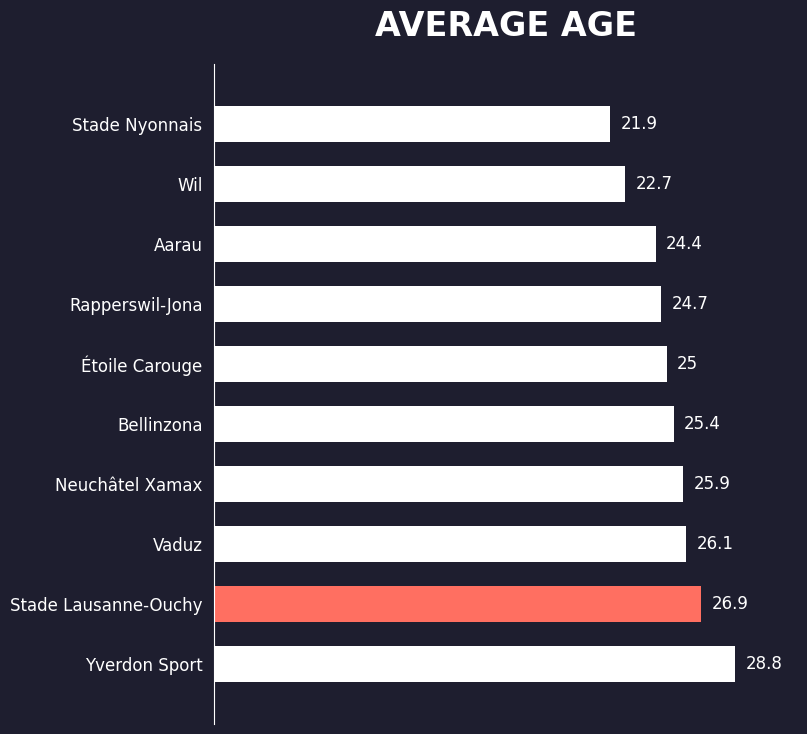

In [84]:
plot_stat_ranking(team, "AVERAGE AGE", stats["age"], lower_is_better=True, is_percent=False)

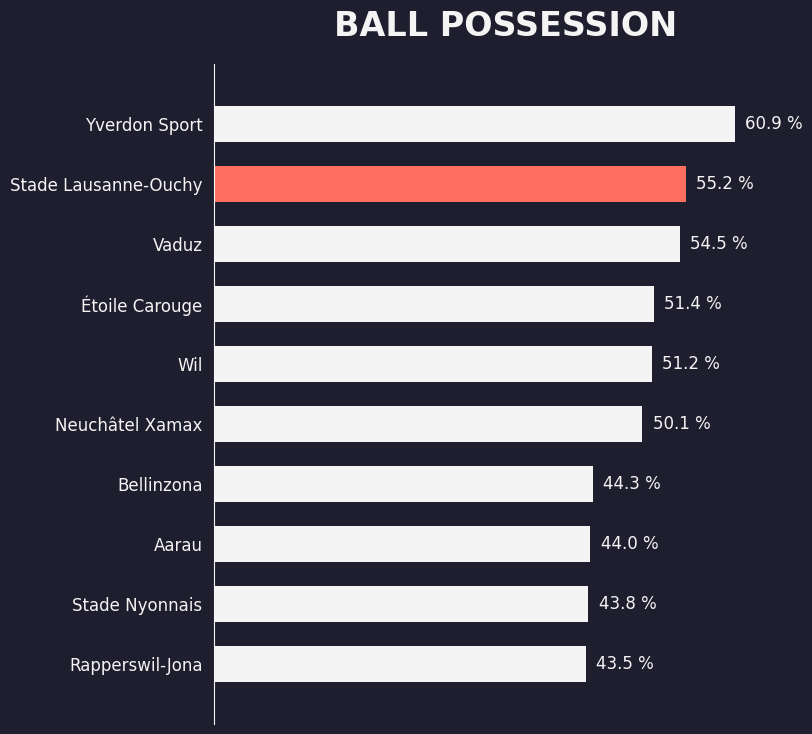

In [7]:
plot_stat_ranking(team, "BALL POSSESSION", stats["possession"], lower_is_better=False, is_percent=True)

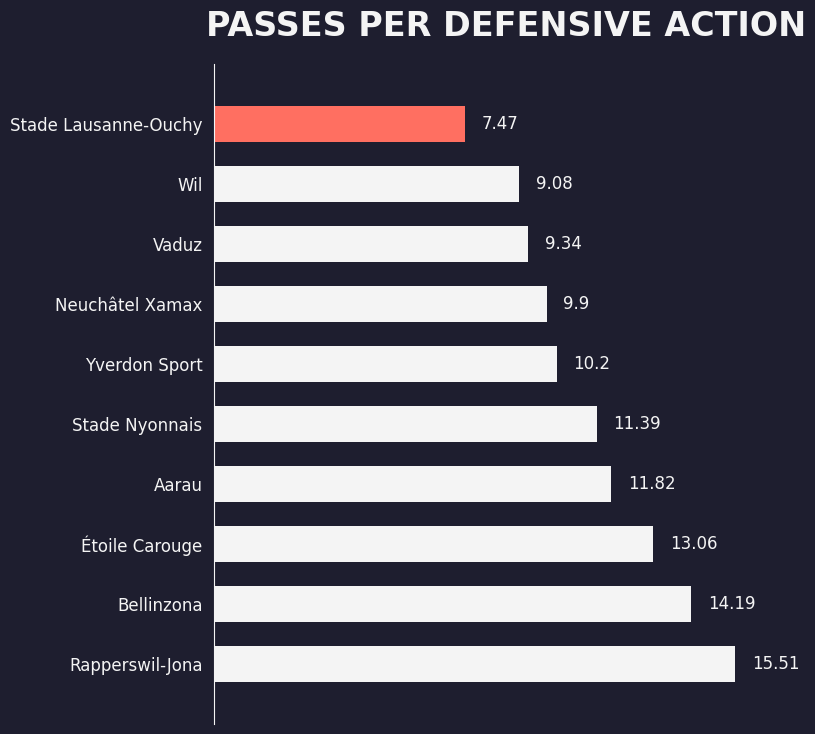

In [9]:
plot_stat_ranking(team, "PASSES PER DEFENSIVE ACTION", stats["ppda"], lower_is_better=True, is_percent=False)

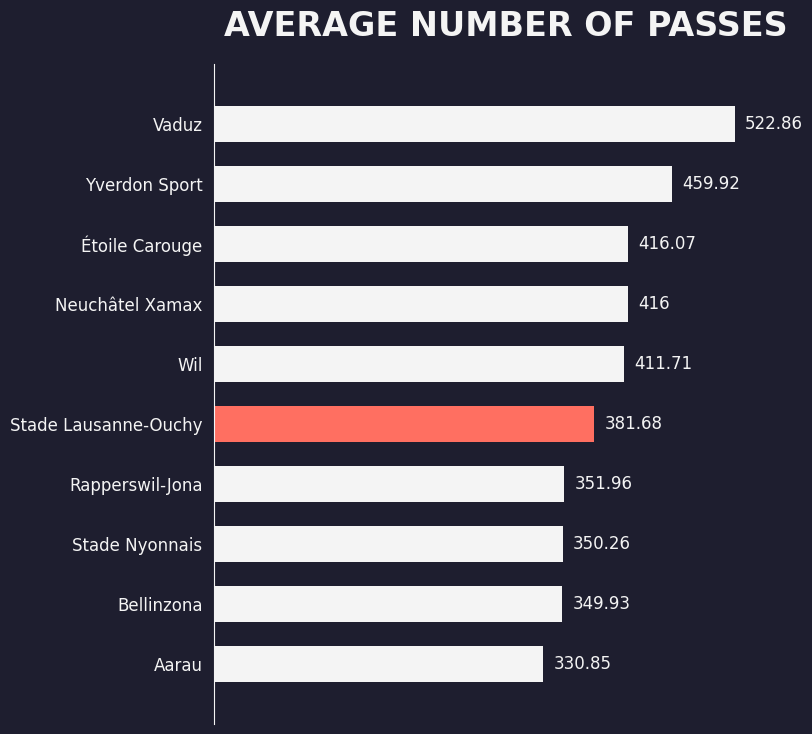

In [8]:
plot_stat_ranking(team, "AVERAGE NUMBER OF PASSES", stats["passes_par_90"], lower_is_better=False, is_percent=False)

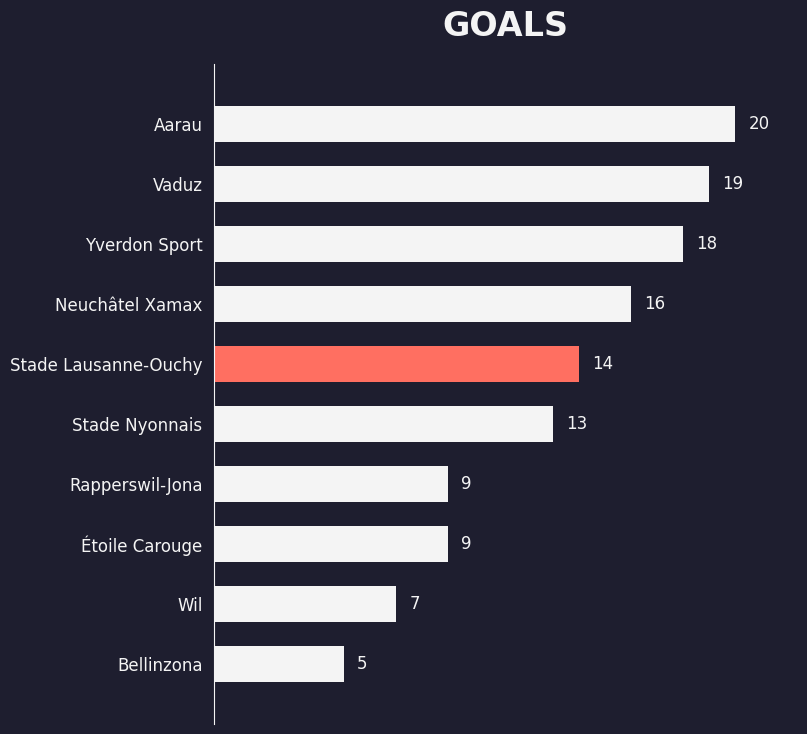

In [12]:
plot_stat_ranking(team, "GOALS", stats["goals"], lower_is_better=False, is_percent=False)

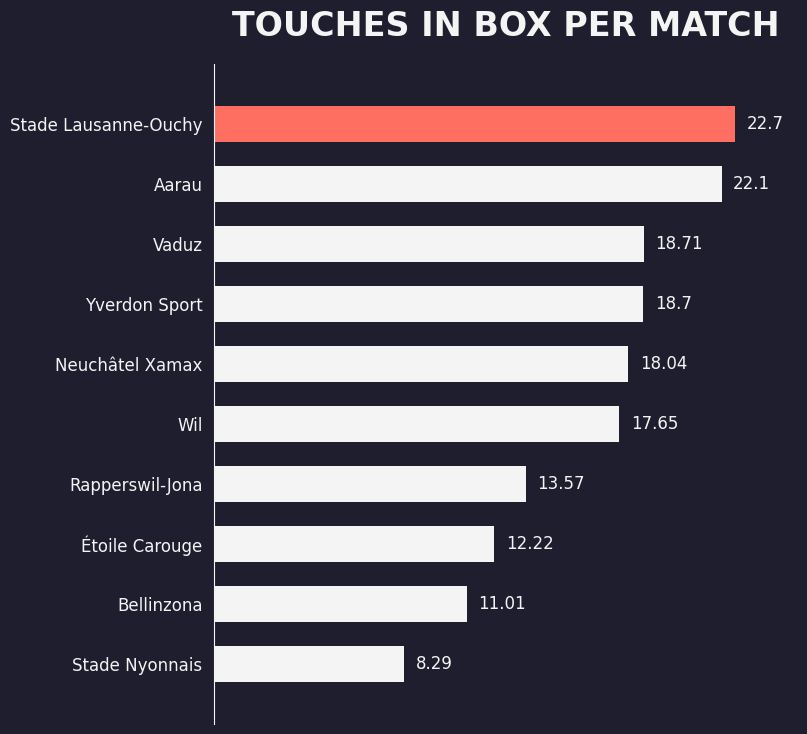

In [17]:
plot_stat_ranking(team, "TOUCHES IN BOX PER MATCH", stats["touches_in_box_par_match"], lower_is_better=False, is_percent=False)

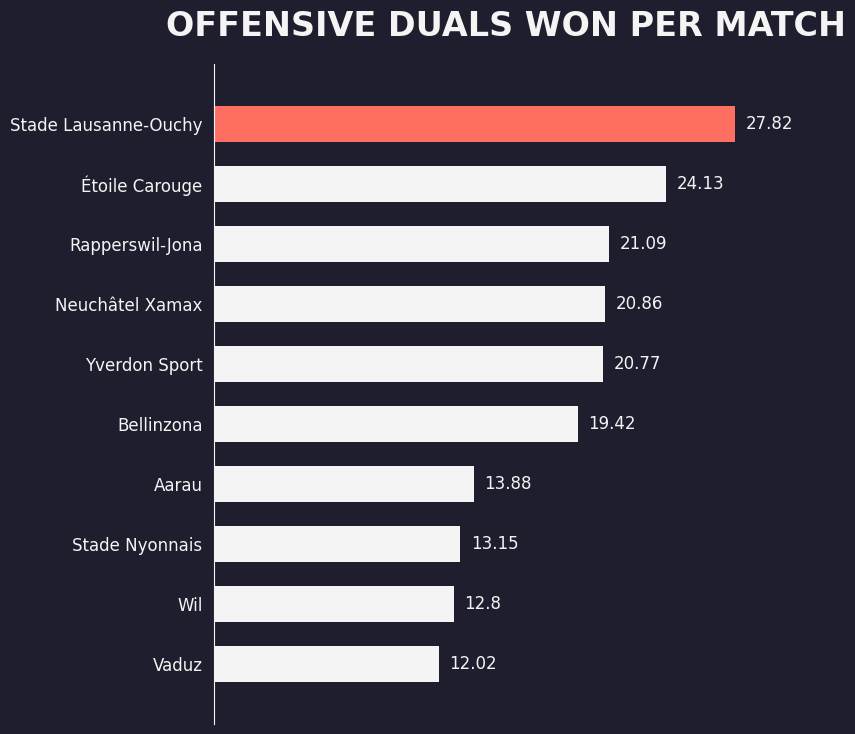

In [19]:
plot_stat_ranking(team, "OFFENSIVE DUALS WON PER MATCH", stats["1vs1_par_match"], lower_is_better=False, is_percent=False)

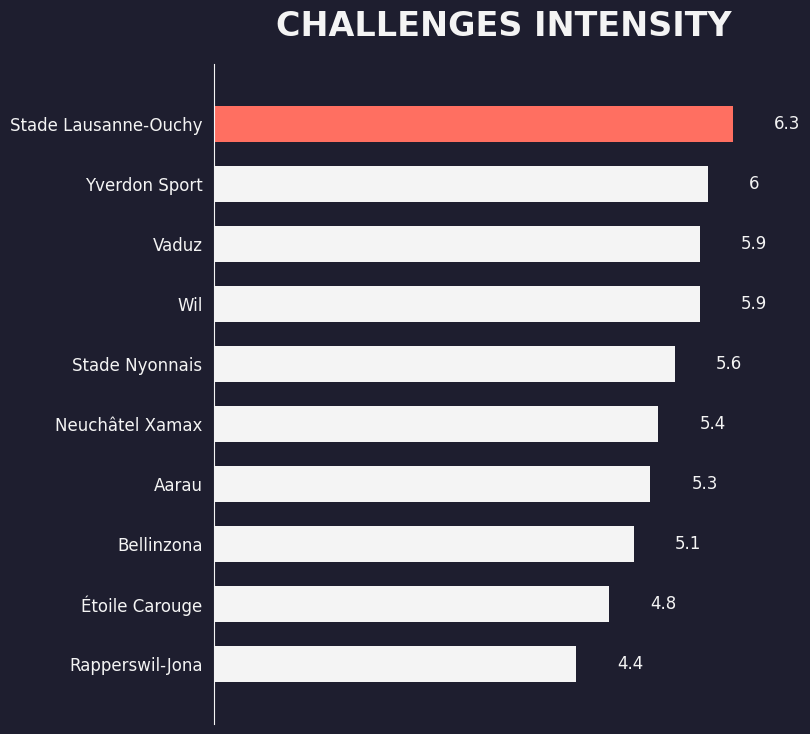

In [21]:
plot_stat_ranking(team, "CHALLENGES INTENSITY", stats["intensite_des_challenges"], lower_is_better=False, is_percent=False)

In [ ]:
# minutes in team

In [26]:
df = pd.read_excel("stade_lausanne_ouchy_131025.xlsx")

In [27]:
df.head()

,Joueur,Équipe,Place,Âge,Valeur sur le marché,Contrat expiration,Matchs joués,Minutes jouées,Buts,xG,Pays de naissance,Passeport pays,Pied,Taille,Poids,Sur prêt
0,D. Da Silva,Stade Lausanne-Ouchy,GK,32,300000,NaN,9,880,0,0.00,Switzerland,"Switzerland, Portugal",droite,188,78,non
1,N. Sutter,Stade Lausanne-Ouchy,"LCB, RCB",30,250000,NaN,9,859,0,0.24,Switzerland,Switzerland,droite,183,73,non
2,B. Conus,Stade Lausanne-Ouchy,LB,27,250000,NaN,9,842,0,0.09,Switzerland,Switzerland,gauche,173,67,non
3,L. Nomel,Stade Lausanne-Ouchy,"LWF, LW",28,350000,NaN,9,757,1,2.38,Côte d'Ivoire,"Côte d'Ivoire, France",droite,182,79,non
4,K. Henry Bah,Stade Lausanne-Ouchy,"RWF, RW",20,0,NaN,9,754,1,1.56,Côte d'Ivoire,Côte d'Ivoire,NaN,0,0,non


In [28]:
minutes = dict(zip(df['Joueur'], df['Minutes jouées  ']))

In [29]:
minutes

{'D. Da Silva': 880,
 'N. Sutter': 859,
 'B. Conus': 842,
 'L. Nomel': 757,
 'K. Henry Bah': 754,
 'J. Nkama': 720,
 'B. Malula': 695,
 'N. Lusuena': 664,
 'E. Akichi': 617,
 'W. Caddy': 568,
 'I. Kaloga': 505,
 'H. Fargues': 428,
 'P. Sutter': 369,
 'M. Sartoretti': 313,
 'N. García': 249,
 'T. Barbet': 194,
 'H. Lukembila': 58,
 'L. Gelato': 34,
 'V. Tritten': 31,
 'R. Kadima': 26,
 'L. de Oliveira': 18,
 'E. Mafoumbi': 14,
 "L. N'Dabrou": 9}

In [25]:
df["Minutes jouées  "]

0     880
1     859
2     842
3     757
4     754
5     720
6     695
7     664
8     617
9     568
10    505
11    428
12    369
13    313
14    249
15    194
16     58
17     34
18     31
19     26
20     18
21     14
22      9
Name: Minutes jouées  , dtype: int64

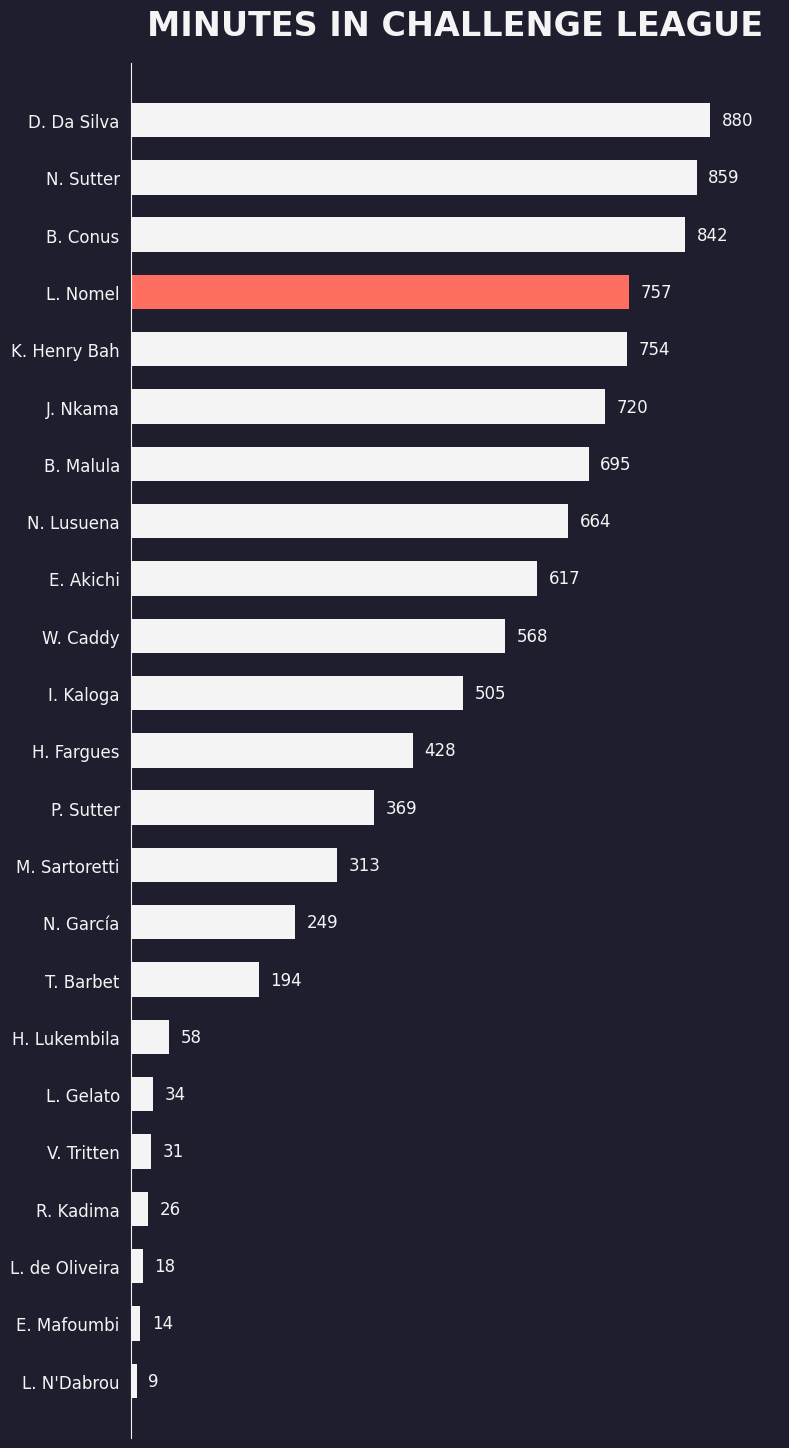

In [30]:
plot_stat_ranking("L. Nomel", "MINUTES IN CHALLENGE LEAGUE", minutes, lower_is_better=False, is_percent=False)

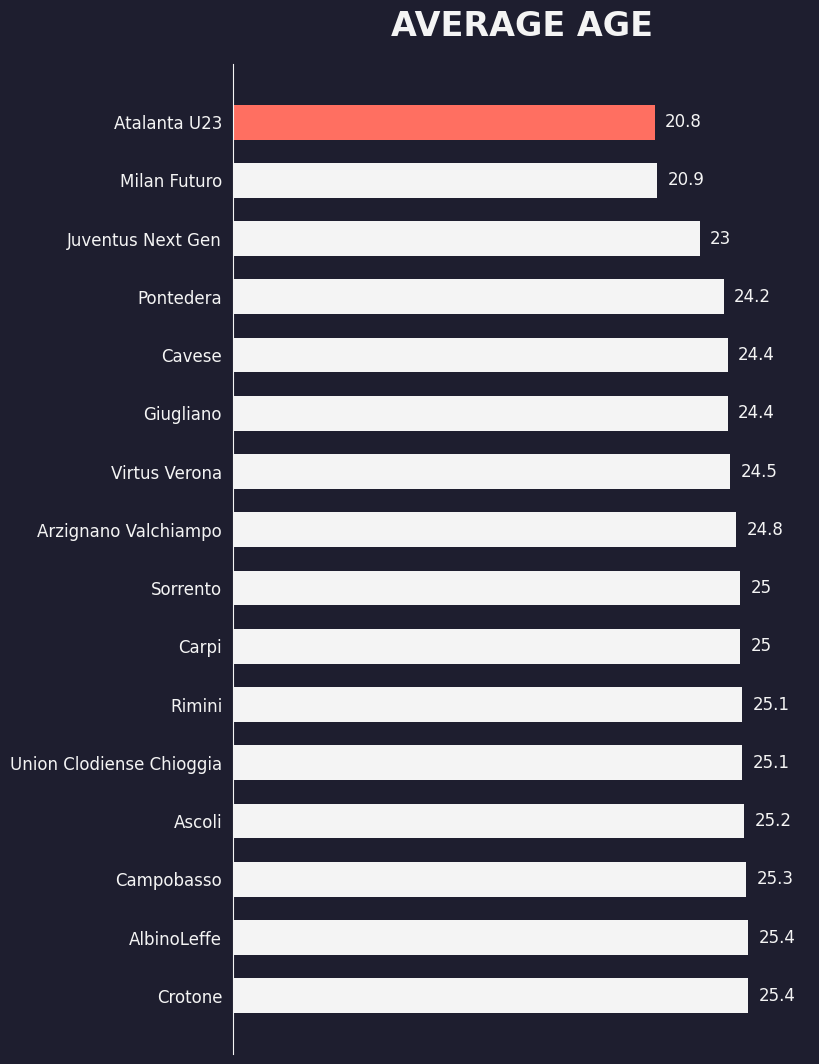

In [25]:
plot_stat_ranking(team, "AVERAGE AGE", stats["age_moyen"], lower_is_better=True, is_percent=False)

In [31]:
from typing import Optional
import numpy as np
import matplotlib.pyplot as plt

def plot_minutes_per_match(
    minutes_by_match: dict,
    title: str,
    player_name: str,
    total_matchdays: Optional[int] = None,
    bar_width: float = 0.7,
    bar_color: str = "#90ee90",
    highlight_color: Optional[str] = None,
    dnp_color: Optional[str] = None,
):
    """Viz minutes/journée, avec DNP et highlight ≠ 90'."""
    bg = globals().get("bg_color", "#1e1e2f")
    txt = globals().get("primary_color", "#ffffff")
    highlight_color = highlight_color or globals().get("secondary_color", "#ff6f61")
    dnp_color = dnp_color or "#4b4d63"

    if total_matchdays is None:
        total_matchdays = max(minutes_by_match.keys()) if minutes_by_match else 34

    match_days = list(range(1, total_matchdays + 1))
    minutes = [0 if minutes_by_match.get(d) in (None, 0) else int(minutes_by_match.get(d)) for d in match_days]
    minutes_arr = np.array(minutes, dtype=int)

    played_mask = minutes_arr > 0
    full90_mask = minutes_arr == 90
    played = int(played_mask.sum())
    full_90 = int(full90_mask.sum())
    avg_minutes = float(minutes_arr[played_mask].mean()) if played else 0.0

    fig_w = max(12, 0.45 * total_matchdays)
    fig, ax = plt.subplots(figsize=(fig_w, 6), facecolor=bg)
    ax.set_facecolor(bg)

    for day, mins in zip(match_days, minutes_arr):
        color, alpha = bar_color, 0.9          # <-- toutes les barres vertes
        ax.bar(day, mins, width=bar_width, color=color, edgecolor="none", alpha=alpha)

        if mins > 0:
            ax.text(day, mins - 3, f"{mins}", ha="center", va="top",
                    color=bg, fontsize=12, fontweight="bold")
        else:
            ax.text(day, 2, "0", ha="center", va="bottom",
                    color=txt, fontsize=10, alpha=0.8)

    ymax = max(100, int(max(minutes_arr.max(), 95) + 15))
    ax.set_xlim(0, total_matchdays + 1)
    ax.set_ylim(0, ymax)

    ax.set_xticks(match_days)
    ax.set_xticklabels([str(d) for d in match_days], color=txt, fontsize=12)
    ax.set_yticks(list(range(0, 100, 10)))
    ax.set_yticklabels([str(y) for y in range(0, 100, 10)], color=txt, fontsize=12)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color(txt);   ax.spines["left"].set_alpha(0.3)
    ax.spines["bottom"].set_color(txt); ax.spines["bottom"].set_alpha(0.3)

    ax.grid(True, axis="y", linestyle="-", alpha=0.1, color=txt)
    ax.grid(False, axis="x")
    ax.tick_params(axis="x", length=0)

    ax.text((total_matchdays + 1) / 2, ymax * 0.96, title,
            ha="center", va="center", color=txt, fontsize=26, fontweight="bold")

    footnote = f"{player_name} — {played} appearances, {full_90} × 90', avg {avg_minutes:.1f}'"
    ax.text((total_matchdays + 1) / 2, -ymax * 0.12, footnote,
            ha="center", va="top", color=txt, fontsize=12, alpha=0.75, style="italic")

    plt.tight_layout()
    plt.show()

In [48]:
minutes_nomel_challengeleague_2025_26 = {
    1: 90,
    2: 90,
    3: 90,
    4: 67,
    5: 67,
    6: 26,
    7: 90,
    8: 90,
    9: 90,
}

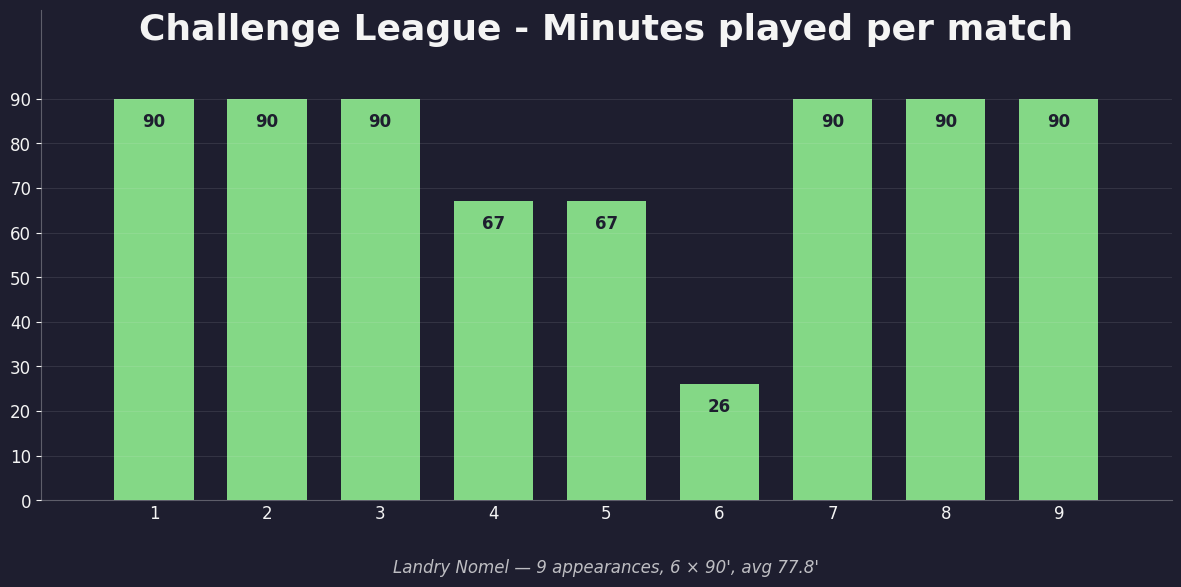

In [37]:
plot_minutes_per_match(
    minutes_nomel_challengeleague_2025_26,
    title="Challenge League - Minutes played per match",
    player_name="Landry Nomel",
    total_matchdays=9,   # ajuste si besoin (34 ou 38 selon la ligue)
)

In [73]:
physique_nomel_challengeleague_2025_26 = {
    1: 4644, #fc wil 1
    2: 9716, #yverdon 2
    4: 6790, #fc rapperswill  4
    5: 7109, # Fc Aarau 5
    3: 8984, # Bellinzona 3
    7: 9605, # Stade Nyonnais 7
    8: 9681, # Vaduz 8
    6: 3175, # Carouge 6
    9: 9021, # Xamax 9
}

vmax_nomel_challengeleague_2025_26 = {
    1: 35.23, #fc wil
    2: 36.65, #yverdon
    4: 34.11,
    5: 32.87,
    3: 32.64,
    7: 34.11,
    8: 35.02,
    6: 32.49,
    9: 32.67,
}

nbsprints_nomel_challengeleague_2025_26 = {
    1: 28, #fc wil
    2: 19, #yverdon
    4: 11,
    5: 12,
    3: 13,
    7: 17,
    8: 14,
    6: 4,
    9: 21,
}

In [74]:
# Revised function with more spacing between bars and improved legend placement
from typing import Optional, Dict
import numpy as np
import matplotlib.pyplot as plt

bg_color = "#1e1e2f"
primary_color = "#ffffff"

def plot_minutes_distance_vmax_spaced(
    minutes_by_match: Dict[int, int],
    distance_by_match_m: Dict[int, float],
    vmax_by_match_kmh: Dict[int, float],
    title: str,
    player_name: str,
    total_matchdays: Optional[int] = None,
    bar_width: float = 0.18,          # narrower bars for readability
    group_gap: float = 0.08,          # extra gap between bars inside each group
    color_minutes: str = "#32CD32",   # green
    color_distance: str = "#1E90FF",  # blue
    color_vmax: str = "#FF4C4C",      # red
):
    """
    Bar chart with 3 bars per matchday and explicit spacing to avoid overlap.
    - Minutes (green, axis 1)
    - Distance meters (blue, axis 2)
    - Vmax km/h (red, scaled to minutes axis; real value shown in label)
    Legend placed centered under the title.
    """
    bg = globals().get("bg_color", "#1e1e2f")
    txt = globals().get("primary_color", "#ffffff")

    # Determine matchdays
    all_days = set(minutes_by_match) | set(distance_by_match_m) | set(vmax_by_match_kmh)
    if total_matchdays is None:
        total_matchdays = max(all_days) if all_days else 0
    days = list(range(1, total_matchdays + 1))

    # Series
    minutes = np.array([int(minutes_by_match.get(d, 0)) for d in days])
    distance = np.array([float(distance_by_match_m.get(d, 0.0)) for d in days])
    vmax = np.array([float(vmax_by_match_kmh.get(d, 0.0)) for d in days])

    # Footer stats
    played_mask = minutes > 0
    appearances = int(played_mask.sum())
    full_90 = int((minutes == 90).sum())
    avg_minutes = float(minutes[played_mask].mean()) if appearances else 0.0

    # Scale vmax to minutes axis
    vmax_max = max(1.0, vmax.max())
    scale_factor = 90.0 / vmax_max
    vmax_scaled = vmax * scale_factor

    # X positions with explicit inner spacing
    x = np.arange(1, total_matchdays + 1, dtype=float)
    offset = bar_width + group_gap
    x_minutes  = x - offset
    x_distance = x
    x_vmax     = x + offset

    # Figure
    fig_w = max(12, 0.8 * total_matchdays)
    fig, ax1 = plt.subplots(figsize=(fig_w, 6))
    fig.patch.set_facecolor(bg)
    ax1.set_facecolor(bg)

    # Bars
    bars_min = ax1.bar(x_minutes, minutes, width=bar_width, color=color_minutes, alpha=0.95, edgecolor="none", label="Minutes")
    bars_vmax = ax1.bar(x_vmax, vmax_scaled, width=bar_width, color=color_vmax, alpha=0.95, edgecolor="none", label="Vitesse max (km/h, échelle minutes)")

    ax2 = ax1.twinx()
    bars_dist = ax2.bar(x_distance, distance, width=bar_width, color=color_distance, alpha=0.9, edgecolor="none", label="Distance (m)")

    # Labels (with small bbox for contrast)
    for rect, val in zip(bars_min, minutes):
        if val > 0:
            ax1.text(rect.get_x() + rect.get_width()/2, rect.get_height() - 2, f"{int(val)}",
                     ha="center", va="top", color=bg, fontsize=10, fontweight="bold",
                     bbox=dict(facecolor=color_minutes, edgecolor='none', boxstyle='round,pad=0.15'))
    for rect, val in zip(bars_vmax, vmax):
        if val > 0:
            ax1.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 2, f"{val:.2f}",
                     ha="center", va="bottom", color=txt, fontsize=9,
                     bbox=dict(facecolor="#00000055", edgecolor='none', boxstyle='round,pad=0.15'))
    for rect, val in zip(bars_dist, distance):
        if val > 0:
            ax2.text(rect.get_x() + rect.get_width()/2, rect.get_height() + distance.max()*0.02, f"{int(val)}",
                     ha="center", va="bottom", color=txt, fontsize=9,
                     bbox=dict(facecolor="#00000055", edgecolor='none', boxstyle='round,pad=0.15'))

    # Axes styling
    ax1.set_xlim(0.25, total_matchdays + 0.75)
    ax1.set_xticks(days)
    ax1.set_xticklabels([str(d) for d in days], color=txt, fontsize=11)
    ax1.set_ylim(0, 105)
    ax1.set_ylabel("Minutes / Vitesse (échelle minutes)", color=txt, fontsize=11)
    ax1.tick_params(axis="y", colors=txt)
    for s in ("top","right"): ax1.spines[s].set_visible(False)
    ax1.spines["left"].set_color(txt); ax1.spines["left"].set_alpha(0.3)
    ax1.spines["bottom"].set_color(txt); ax1.spines["bottom"].set_alpha(0.3)
    ax1.grid(True, axis="y", linestyle="-", alpha=0.12, color=txt)

    ax2.set_ylabel("Distance (m)", color=txt, fontsize=11)
    ax2.set_ylim(0, max(1000, distance.max()*1.25))
    ax2.tick_params(axis="y", colors=txt)
    ax2.spines["top"].set_visible(False)
    ax2.spines["right"].set_color(txt); ax2.spines["right"].set_alpha(0.3)

    # Title & footer
    ax1.set_title(title, color=txt, fontsize=22, pad=10, fontweight="bold")
    foot = f"{player_name} — {appearances} appearances, {full_90} × 90', avg {avg_minutes:.1f}' | Vitesse max échelle ×{scale_factor:.2f}"
    fig.text(0.5, -0.035, foot, ha="center", va="top", color=txt, fontsize=11, style="italic")

    # Improved legend: centered, under title, 3 columns
    handles = [bars_min, bars_dist, bars_vmax]
    labels = ["Minutes", "Distance (m)", "Vitesse max (km/h, échelle minutes)"]
    leg = fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 0.97), ncol=3, frameon=False)
    for text in leg.get_texts():
        text.set_color(txt)

    plt.tight_layout()
    plt.show()


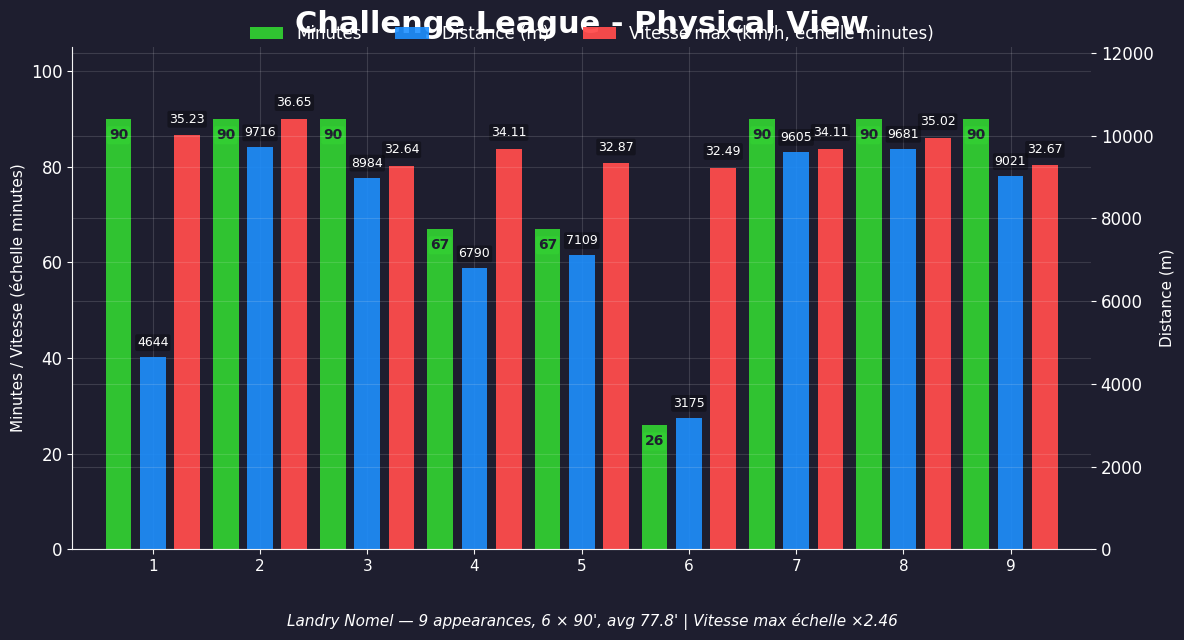

In [75]:
plot_minutes_distance_vmax_spaced(
    minutes_by_match=minutes_nomel_challengeleague_2025_26,
    distance_by_match_m=physique_nomel_challengeleague_2025_26,
    vmax_by_match_kmh=vmax_nomel_challengeleague_2025_26,
    title="Challenge League - Physical View",
    player_name="Landry Nomel",
    total_matchdays=9,
    bar_width=0.24,
    color_minutes="#32CD32",  # vert
    color_distance="#1E90FF", # bleu
    color_vmax="#FF4C4C",     # rouge
)

In [78]:
from typing import Optional, Dict
import numpy as np
import matplotlib.pyplot as plt

# (optionnel) couleurs globales
bg_color = "#1e1e2f"
primary_color = "#ffffff"

def plot_minutes_distance_vmax_spacious(
    minutes_by_match: Dict[int, int],
    distance_by_match_m: Dict[int, float],
    vmax_by_match_kmh: Dict[int, float],
    title: str,
    player_name: str,
    total_matchdays: Optional[int] = None,
    # mise en page
    bar_width: float = 0.16,      # largeur des barres
    inner_gap: float = 0.12,      # espace entre les 3 barres d’un même groupe
    group_spacing: float = 1.35,  # espace entre journées (abscisses)
    # couleurs
    color_minutes: str = "#32CD32",   # vert
    color_distance: str = "#1E90FF",  # bleu
    color_vmax: str = "#FF4C4C",      # rouge
):
    """
    Trace, pour chaque journée, 3 barres :
      - Minutes jouées (axe Y principal, vert)
      - Distance parcourue en mètres (axe Y secondaire, bleu)
      - Vitesse max (km/h) mise à l’échelle de l’axe des minutes, rouge
    Les valeurs réelles sont annotées sur les barres. Espacements soignés
    entre titre, légende et graphe.
    """
    # couleurs de fond/texte
    bg = globals().get("bg_color", "#1e1e2f")
    txt = globals().get("primary_color", "#ffffff")

    # journées
    all_days = set(minutes_by_match) | set(distance_by_match_m) | set(vmax_by_match_kmh)
    if total_matchdays is None:
        total_matchdays = max(all_days) if all_days else 0
    days = list(range(1, total_matchdays + 1))

    # séries
    minutes = np.array([int(minutes_by_match.get(d, 0)) for d in days])
    distance = np.array([float(distance_by_match_m.get(d, 0.0)) for d in days])
    vmax = np.array([float(vmax_by_match_kmh.get(d, 0.0)) for d in days])

    # stats pied de figure
    played_mask = minutes > 0
    appearances = int(played_mask.sum())
    full_90 = int((minutes == 90).sum())
    avg_minutes = float(minutes[played_mask].mean()) if appearances else 0.0

    # mise à l’échelle de la Vmax sur l’axe des minutes
    vmax_max = max(1.0, float(vmax.max()))
    scale_factor = 90.0 / vmax_max
    vmax_scaled = vmax * scale_factor

    # positions X avec espacement entre groupes et entre barres
    x_base = np.arange(total_matchdays, dtype=float) * group_spacing + 1.0
    x_minutes  = x_base - (bar_width + inner_gap)
    x_distance = x_base
    x_vmax     = x_base + (bar_width + inner_gap)

    # figure & axes
    fig_w = max(12, 0.9 * total_matchdays * group_spacing)
    fig, ax1 = plt.subplots(figsize=(fig_w, 6))
    fig.patch.set_facecolor(bg)
    ax1.set_facecolor(bg)

    # barres minutes & vmax (axe principal)
    bars_min = ax1.bar(x_minutes, minutes, width=bar_width,
                       color=color_minutes, alpha=0.95, edgecolor="none", label="Minutes")
    bars_vmx = ax1.bar(x_vmax, vmax_scaled, width=bar_width,
                       color=color_vmax, alpha=0.95, edgecolor="none",
                       label="Vitesse max (km/h, échelle minutes)")

    # barres distance (axe secondaire)
    ax2 = ax1.twinx()
    bars_dis = ax2.bar(x_distance, distance, width=bar_width,
                       color=color_distance, alpha=0.9, edgecolor="none", label="Distance (m)")

    # annotations lisibles (petit fond)
    for rect, val in zip(bars_min, minutes):
        if val > 0:
            ax1.text(rect.get_x()+rect.get_width()/2, rect.get_height()-2, f"{int(val)}",
                     ha="center", va="top", color=bg, fontsize=10, fontweight="bold",
                     bbox=dict(facecolor=color_minutes, edgecolor='none', boxstyle='round,pad=0.1'))
    for rect, val in zip(bars_vmx, vmax):
        if val > 0:
            ax1.text(rect.get_x()+rect.get_width()/2, rect.get_height()+2, f"{val:.2f}",
                     ha="center", va="bottom", color=txt, fontsize=9,
                     bbox=dict(facecolor="#00000066", edgecolor='none', boxstyle='round,pad=0.12'))
    for rect, val in zip(bars_dis, distance):
        if val > 0:
            ax2.text(rect.get_x()+rect.get_width()/2, rect.get_height()+max(distance)*0.02, f"{int(val)}",
                     ha="center", va="bottom", color=txt, fontsize=9,
                     bbox=dict(facecolor="#00000066", edgecolor='none', boxstyle='round,pad=0.12'))

    # style axes
    ax1.set_xlim(x_base.min() - 0.8, x_base.max() + 0.8)
    ax1.set_xticks(x_base)
    ax1.set_xticklabels([str(d) for d in days], color=txt, fontsize=12)
    ax1.set_ylim(0, 105)
    ax1.set_ylabel("Minutes", color=txt, fontsize=11)
    ax1.tick_params(axis="y", colors=txt)
    for s in ("top", "right"): ax1.spines[s].set_visible(False)
    ax1.spines["left"].set_color(txt);   ax1.spines["left"].set_alpha(0.3)
    ax1.spines["bottom"].set_color(txt); ax1.spines["bottom"].set_alpha(0.3)
    ax1.grid(True, axis="y", linestyle="-", alpha=0.12, color=txt)

    ax2.set_ylabel("Distance (m)", color=txt, fontsize=11)
    ax2.set_ylim(0, max(1000, distance.max() * 1.25))
    ax2.tick_params(axis="y", colors=txt)
    ax2.spines["top"].set_visible(False)
    ax2.spines["right"].set_color(txt);  ax2.spines["right"].set_alpha(0.3)

    # espacement global (titre / légende / graphe / footer)
    fig.subplots_adjust(top=0.95, bottom=0.20)          # réserve de place haut/bas
    ax1.set_title(title, color=txt, fontsize=24, pad=14, fontweight="bold")

    # légende centrée sous le titre (3 colonnes)
    handles = [bars_min, bars_dis, bars_vmx]
    labels = ["Minutes", "Distance (m)", "Vitesse max (km/h)"]
    leg = fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.0),
                     ncol=3, frameon=False, borderaxespad=0.8, handletextpad=0.6, columnspacing=1.4)
    for t in leg.get_texts():
        t.set_color(txt)

    # pied de figure
    foot = (f"{player_name} — {appearances} appearances, {full_90} × 90', "
            f"avg {avg_minutes:.1f}'")
    fig.text(0.5, 0.08, foot, ha="center", va="center", color=txt,
             fontsize=11, style="italic")

    plt.show()


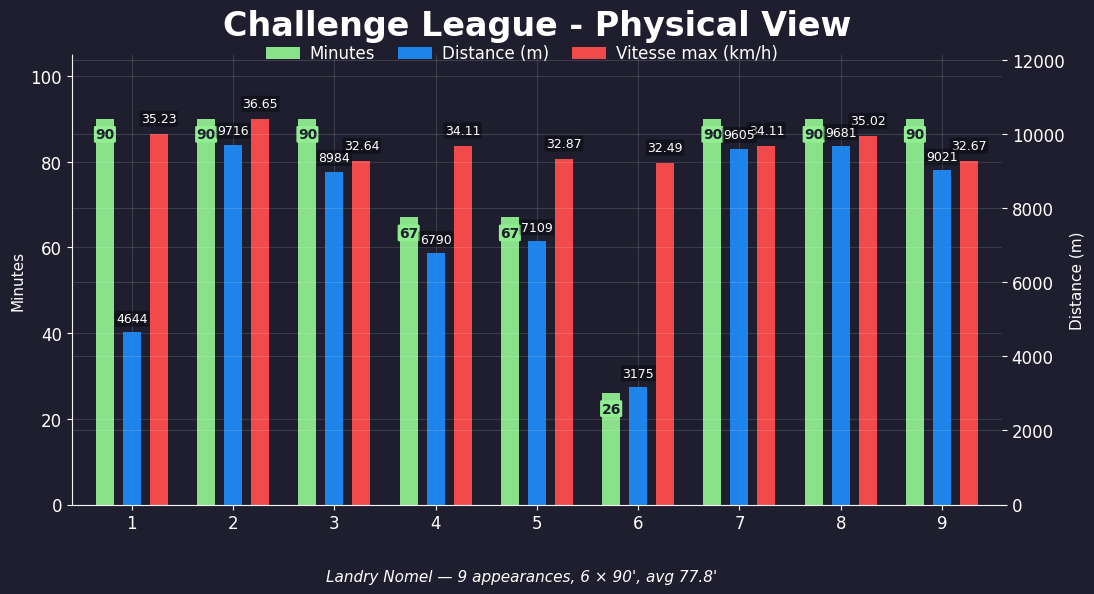

In [79]:
plot_minutes_distance_vmax_spacious(
    minutes_by_match=minutes_nomel_challengeleague_2025_26,
    distance_by_match_m=physique_nomel_challengeleague_2025_26,
    vmax_by_match_kmh=vmax_nomel_challengeleague_2025_26,
    title="Challenge League - Physical View",
    player_name="Landry Nomel",
    total_matchdays=9,
    bar_width=0.24,
    color_minutes="#90ee90",  # vert
    color_distance="#1E90FF", # bleu
    color_vmax="#FF4C4C",     # rouge
)